(6480000, 4)
(6480000,)
996 0


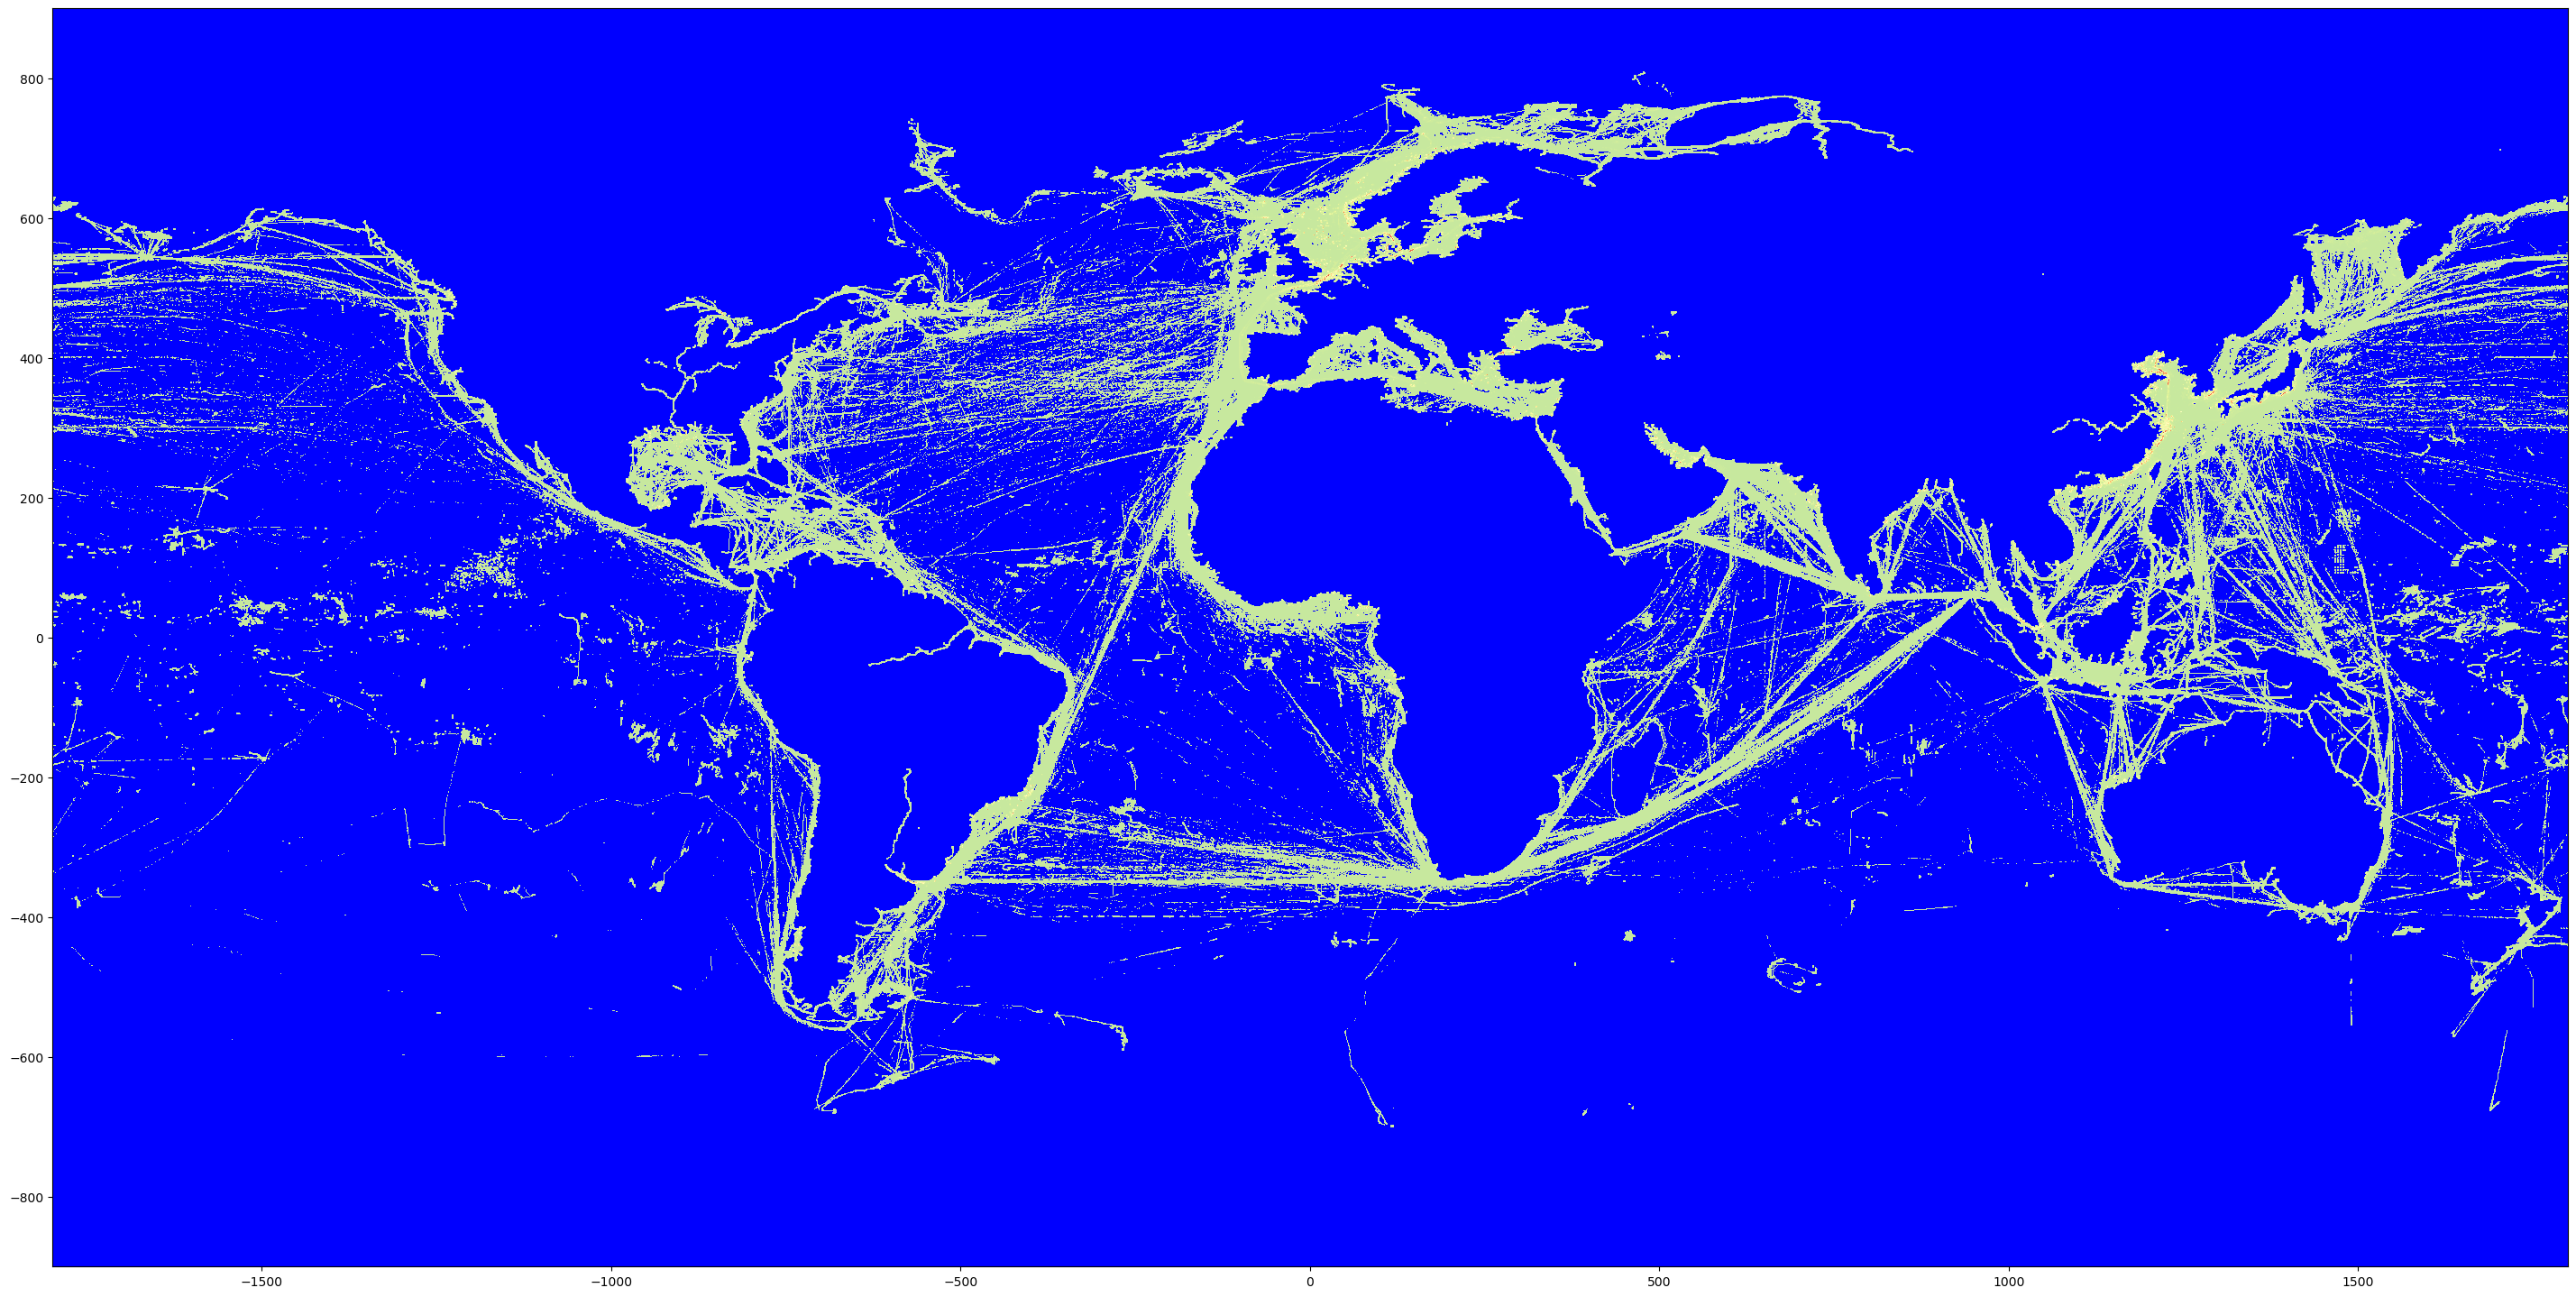

In [686]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.cluster.vq as scv
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import math
def func(x, a, b, c, d):
    return a * np.exp(b * (x+d)) + c

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def create_linear_slope(x_start, x_end, y_start, y_end):
    slope = y_end - y_start / (x_end - x_start)
    return slope

cmap = cm.jet
# new_cmap = truncate_colormap(cmap, 0.0, 0.7465)
new_cmap = truncate_colormap(cm.Spectral_r, 0.35, 1.0)

def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    # gradient=cmap(np.apply_along_axis(func, 0,np.linspace(0.0,10.0,100)))
    gradient=cmap(np.linspace(0.0,1.0,1000))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))
    print(arr2.shape)

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)
    print(code.shape)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    print(code.max(),code.min())
    values=code.astype('float')/gradient.shape[0]
    non_zero = values[values != 0]
    range_of_x = non_zero.max() - non_zero.min()
    for index, i in enumerate(values):
        if i == 0:
            continue
        else:
            i = (i - non_zero.min()) / range_of_x
            # 0, 0.05, 0.1, 0.2, 0.5, 2, 5, 10, 20, 100, 150
            if i <= 0.1:
                slope = create_linear_slope(0, 0.1, 0, 0.05)
                c = 0 - slope * 0
                y = slope * i + c
                values[index] = y
            elif i <= 0.2:
                slope = create_linear_slope(0.1, 0.2, 0.05, 0.1)
                c = 0.05 - slope * 0.1
                y = slope * i + c
                values[index] = y
            elif i <= 0.3:
                slope = create_linear_slope(0.2, 0.3, 0.1, 0.2)
                c = 0.1 - slope * 0.2
                y = slope * i + c
                values[index] = y
            elif i <= 0.4:
                slope = create_linear_slope(0.3, 0.4, 0.2, 0.5)
                c = 0.2 - slope * 0.3
                y = slope * i + c
                values[index] = y
            elif i <= 0.5:
                slope = create_linear_slope(0.4, 0.5, 0.5, 2)
                c = 0.5 - slope * 0.4
                y = slope * i + c
                values[index] = y
            elif i <= 0.6:
                slope = create_linear_slope(0.5, 0.6, 2, 5)
                c = 2 - slope * 0.5
                y = slope * i + c
                values[index] = y
            elif i <= 0.7:
                slope = create_linear_slope(0.6, 0.7, 5, 10)
                c = 5 - slope * 0.6
                y = slope * i + c
                values[index] = y
            elif i <= 0.8:
                slope = create_linear_slope(0.7, 0.8, 10, 20)
                c = 10 - slope * 0.7
                y = slope * i + c
                values[index] = y
            elif i <= 0.9:
                slope = create_linear_slope(0.8, 0.9, 20, 100)
                c = 20 - slope * 0.8
                y = slope * i + c
                values[index] = y
            elif i <= 1.0:
                slope = create_linear_slope(0.9, 1.0, 100, 500)
                c = 100 - slope * 0.9
                y = slope * i + c
                values[index] = y
            # else:
            #     values[index] = func(((i - non_zero.min()) / range_of_x) * 10, *popt)
            # values[index] = (i - non_zero.min()) / range_of_x
            # values[index] = i


    # Reshape values back to (240,240)
    values=values.reshape(1800, 3600)
    values=values[::-1]
    return values
fig, ax = plt.subplots(figsize=(36,72))

arr=plt.imread('2020-04-01_10km_density.png')
values=colormap2arr(arr,cmap)    
# Proof that it works:
new_cmap.set_under('blue')
plt.imshow(values, cmap=new_cmap,
           origin='lower', extent=[-1800,1800,-900,900], vmin=0.001)


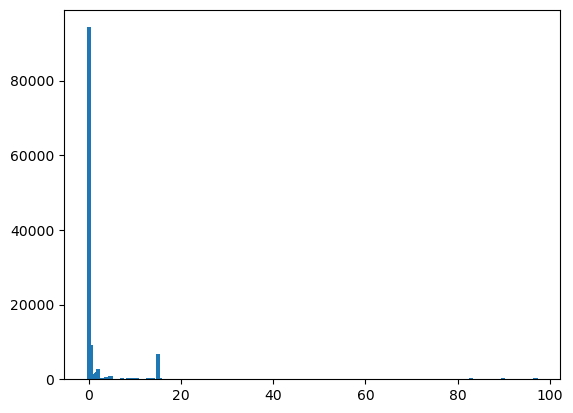

In [696]:
nibba = np.ravel(values)
non_zero = nibba[nibba != 0]
# non_zero = func(non_zero * 10)
unique_elements, counts_elements = np.unique(non_zero, return_counts=True)
# I want to create a graph using matplotlib to show the distribution of the values in the array
plt.bar(unique_elements, counts_elements, width=1)
plt.show()

In [697]:
print(non_zero.sum())
print(non_zero.max(), non_zero.min())

# 783938
# 783904


# 227527
# 1264740
# 183102

337501.5519672131
96.86475409836078 0.00040983606557377087


/var/folders/s5/v0_8dzqs23zfjf0tj0f77v540000gp/T/ipykernel_1424/227621923.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * (x+d)) + c


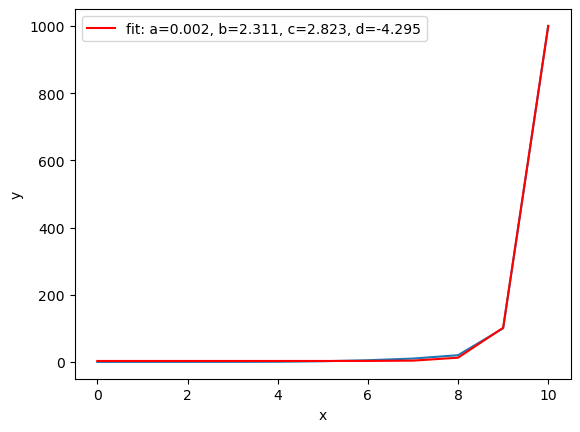

In [689]:
import scipy
# use scipy to find out what curve equation fits a certain x and y data set
def func(x, a, b, c, d):
    return a * np.exp(b * (x+d)) + c
what_is_this = np.array([0, 0.05, 0.1, 0.2, 0.5, 2, 5, 10, 20, 100, 1000])
index = np.arange(0, len(what_is_this))
popt, pcov = scipy.optimize.curve_fit(func, index, what_is_this)
plt.plot(index, what_is_this)
plt.plot(index, func(index, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [690]:
func(9, *popt)

101.65362190068902

In [691]:
print(popt)

[ 1.86977765e-03  2.31143593e+00  2.82308355e+00 -4.29498427e+00]


In [692]:
print(np.linspace(0.0,10.0,100))
np.apply_along_axis(func, 0,np.linspace(0.0,10.0,100))

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

TypeError: func() missing 4 required positional arguments: 'a', 'b', 'c', and 'd'

In [ ]:
40000 * 0.05

2000.0